In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#### Changing Directory

In [2]:
os.chdir(r'C:\Users\Bushra Ansari\Desktop\LMS_DATASET\Clustering\Clustering_H\Hierarchical Clustering')

In [3]:
os.listdir()

['Cluster3.xlsx',
 'Cluster4.xlsx',
 'Cluster5.xlsx',
 'google_review_ratings.csv',
 'Problem Statement_Heirarchical Clustering.pdf']

#### Reading the dataset

In [4]:
review = pd.read_csv('google_review_ratings.csv')
review.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
review.shape

(5456, 26)

In [6]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

#### Dropping unimportant columns

In [7]:
review.drop(columns = ['User', 'Unnamed: 25'], inplace = True)

In [8]:
review.columns

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24'],
      dtype='object')

#### Changing Categories' names

In [9]:
dict = {'Category 1' : 'Churches', 'Category 2' : 'Resorts', 'Category 3' : 'Beaches', 'Category 4' : 'Parks', 
        'Category 5' : 'Theatres','Category 6' : 'Museums', 'Category 7' : 'Malls', 'Category 8' : 'Zoo', 
        'Category 9' : 'Restaurants', 'Category 10' : 'Pubs/Bars', 'Category 11' : 'Local Services', 
        'Category 12' : 'Burger/Pizza Shops', 'Category 13' : 'Hotels/Other Lodgings', 'Category 14' : 'Juice Bars',
       'Category 15' : 'Art Galleries', 'Category 16' : 'Dance Clubs', 'Category 17' : 'Swimming Pools', 
        'Category 18' : 'Gyms','Category 19' : 'Bakeries', 'Category 20' : 'Beauty & Spas', 'Category 21' : 'Cafes', 
        'Category 22' : 'Viewpoints', 'Category 23' : 'Monuments', 'Category 24' : 'Gardens'}

In [10]:
review.rename(columns = dict, inplace = True)
review.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs/Bars,...,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Beauty & Spas,Cafes,Viewpoints,Monuments,Gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


#### Checking missing values

In [11]:
review.isnull().sum()

Churches                 0
Resorts                  0
Beaches                  0
Parks                    0
Theatres                 0
Museums                  0
Malls                    0
Zoo                      0
Restaurants              0
Pubs/Bars                0
Local Services           0
Burger/Pizza Shops       1
Hotels/Other Lodgings    0
Juice Bars               0
Art Galleries            0
Dance Clubs              0
Swimming Pools           0
Gyms                     0
Bakeries                 0
Beauty & Spas            0
Cafes                    0
Viewpoints               0
Monuments                0
Gardens                  1
dtype: int64

#### Imputing missing values

In [12]:
review['Burger/Pizza Shops'].fillna(review['Burger/Pizza Shops'].median(), inplace = True)

In [13]:
review['Gardens'].fillna(review['Gardens'].median(), inplace = True)

In [14]:
review['Local Services'].unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [15]:
review['Local Services'].replace('2\t2.', np.nan, inplace=True)

In [16]:
review['Local Services'].fillna(review['Local Services'].median(), inplace = True)

In [17]:
review['Local Services'] = review['Local Services'].astype(float)

#### Checking Outliers

In [18]:
review.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Churches,5456.0,1.455720,0.827604,0.00,0.0000,0.000,0.00,0.510,0.5500,0.69,0.92,1.340,1.8100,2.380,2.6400,2.690,3.66,4.439,5.0,5.0
Resorts,5456.0,2.319707,1.421438,0.00,0.0000,0.510,0.55,0.600,0.6400,0.85,1.36,1.905,2.6825,5.000,5.0000,5.000,5.00,5.000,5.0,5.0
Beaches,5456.0,2.489331,1.247815,0.00,0.8600,1.180,1.26,1.280,1.3100,1.39,1.54,2.060,2.7400,5.000,5.0000,5.000,5.00,5.000,5.0,5.0
Parks,5456.0,2.796886,1.309159,0.83,1.2600,1.311,1.33,1.350,1.3600,1.42,1.73,2.460,4.0925,5.000,5.0000,5.000,5.00,5.000,5.0,5.0
Theatres,5456.0,2.958941,1.339056,1.12,1.2555,1.321,1.34,1.370,1.3900,1.45,1.77,2.670,4.3125,5.000,5.0000,5.000,5.00,5.000,5.0,5.0
Museums,5456.0,2.893490,1.282400,1.11,1.2455,1.290,1.32,1.350,1.3700,1.46,1.79,2.680,3.8400,5.000,5.0000,5.000,5.00,5.000,5.0,5.0
Malls,5456.0,3.351395,1.413492,1.12,1.2300,1.280,1.30,1.320,1.3600,1.55,1.93,3.230,5.0000,5.000,5.0000,5.000,5.00,5.000,5.0,5.0
Zoo,5456.0,2.540795,1.111391,0.86,0.9700,1.110,1.18,1.250,1.2800,1.36,1.62,2.170,3.1900,4.140,5.0000,5.000,5.00,5.000,5.0,5.0
Restaurants,5456.0,3.126019,1.356802,0.84,1.1900,1.250,1.30,1.322,1.3500,1.51,1.80,2.800,5.0000,5.000,5.0000,5.000,5.00,5.000,5.0,5.0
Pubs/Bars,5456.0,2.832729,1.307665,0.81,0.8700,0.950,1.02,1.112,1.1875,1.36,1.64,2.680,3.5300,5.000,5.0000,5.000,5.00,5.000,5.0,5.0


No outliers present in the dataset.

#### Data Normalisation

In [19]:
from sklearn.preprocessing import normalize
data_scaled = normalize(review)
data_scaled = pd.DataFrame(data_scaled, columns=review.columns)
data_scaled.head() 

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs/Bars,...,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Beauty & Spas,Cafes,Viewpoints,Monuments,Gardens
0,0.0,0.000000,0.333580,0.335418,0.459476,0.268334,0.459476,0.215954,0.214116,0.242603,...,0.159898,0.054218,0.045948,0.0,0.045948,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.331487,0.333313,0.456593,0.266651,0.456593,0.241081,0.212773,0.241995,...,0.158895,0.053878,0.045659,0.0,0.045659,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,...,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0
3,0.0,0.045907,0.333288,0.333288,0.459075,0.268100,0.459075,0.215765,0.213929,0.242391,...,0.159758,0.054171,0.045907,0.0,0.045907,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,...,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0


### Dendogram

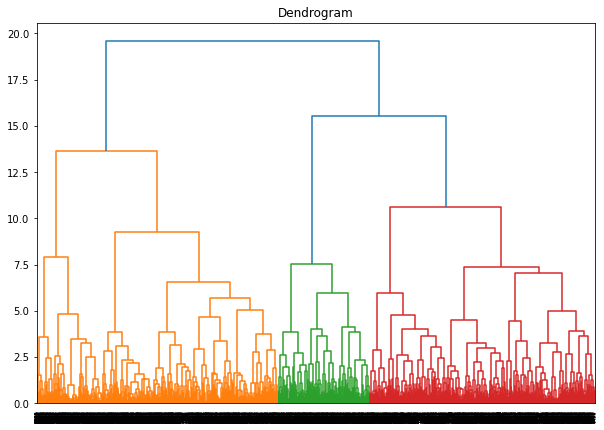

In [20]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

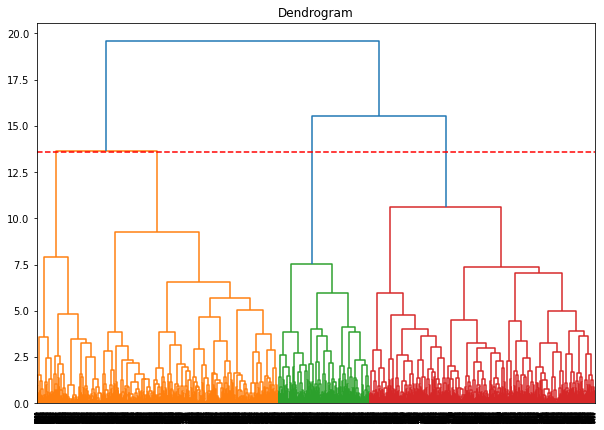

In [21]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=13.6, color='r', linestyle='--')

#### n_clusters = 3

In [22]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

In [23]:
cl=cluster.fit_predict(data_scaled)
cl

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [24]:
labels = cluster.labels_
labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [25]:
review["Cluster"]=cl
review.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs/Bars,...,Dance Clubs,Swimming Pools,Gyms,Bakeries,Beauty & Spas,Cafes,Viewpoints,Monuments,Gardens,Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1


In [26]:
review["Cluster"].value_counts()

0    2367
1    2201
2     888
Name: Cluster, dtype: int64

In [28]:
score1 = metrics.silhouette_score(review, cl)
print('Silhouette Score : % 0.3f' % score1)

Silhouette Score :  0.139


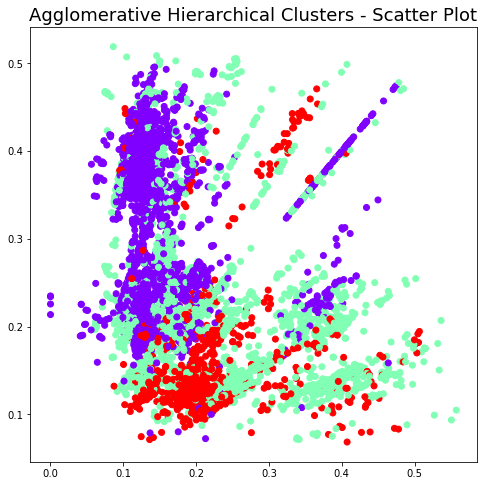

In [30]:
plt.figure(figsize =(8, 8))
plt.scatter(data_scaled['Beaches'], data_scaled['Restaurants'], c = cluster.fit_predict(data_scaled), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

#### n_clusters = 4

In [31]:
from sklearn.cluster import AgglomerativeClustering

cluster1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  

In [32]:
cl1 = cluster1.fit_predict(data_scaled)
cl1

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [33]:
review["Cluster"]=cl1
review.head()

,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,Pubs/Bars,...,Dance Clubs,Swimming Pools,Gyms,Bakeries,Beauty & Spas,Cafes,Viewpoints,Monuments,Gardens,Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0


In [34]:
review["Cluster"].value_counts()

0    2201
1    1724
2     888
3     643
Name: Cluster, dtype: int64

In [35]:
score2 = metrics.silhouette_score(review, cl1)
print('Silhouette Score : % 0.3f' % score2)

Silhouette Score :  0.149


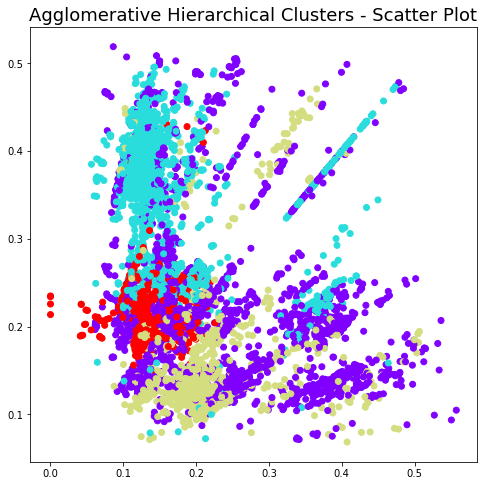

In [36]:
plt.figure(figsize =(8, 8))
plt.scatter(data_scaled['Beaches'], data_scaled['Restaurants'], c = cluster1.fit_predict(data_scaled), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()